<a href="https://colab.research.google.com/github/Tvorozh0k/ssu-ml-course/blob/main/9_neural_networks_part1/ML_NN_1_D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Подключение библиотек

In [ ]:
#@title Подключение и настройка библиотеки Pandas

import pandas as pd

from google.colab import drive
from google.colab import data_table
from google.colab.data_table import DataTable

DataTable.num_rows_per_page = 10
DataTable.max_columns = 60
data_table.enable_dataframe_formatter()

In [ ]:
#@title Подключение графических библиотек

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#@title Подключение математических библиотек

import random
import numpy as np

In [ ]:
#@title Библиотека для анализа PCA

!pip install prince

In [ ]:
#@title Подключение библиотеки Sklearn

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.datasets import load_digits

# модели машинного обучения
from sklearn.neural_network import MLPClassifier

# оценки качества моделей
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# преобразование признаков
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# понижение размерности
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import Isomap, SpectralEmbedding, TSNE
from sklearn.neighbors import NeighborhoodComponentsAnalysis

# отбор признаков
from sklearn.feature_selection import SelectKBest, SequentialFeatureSelector

# заполнение пропусков
from sklearn.impute import SimpleImputer

# конструкторы
from sklearn.pipeline import Pipeline

In [ ]:
#@title Подбор гиперпараметров, основанный на генетических алгоритмах

!pip install tpot

## Загрузка датасета

In [ ]:
#@title Датасет (данные)

X, y = load_digits(return_X_y=True)
X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
#@title Датасет (изображения)

digits = load_digits()
train_ind, test_ind = list(X_train.index), list(X_test.index)

In [ ]:
#@title Статистические данные

print('Обучающая выборка:', X_train.shape)
print('Тестовая выборка:', X_test.shape)

Обучающая выборка: (1347, 64)
Тестовая выборка: (450, 64)


In [ ]:
#@title Распределение по классам

fig = px.histogram(x=list(y_train)+list(y_test), color=["train" for x in y_train]+["test" for x in y_test], barmode='overlay')

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    title="Распределение по классам",
    xaxis_title="Цифра",
    yaxis_title="Кол-во",
    legend_title="Выборка"
)

fig.show()

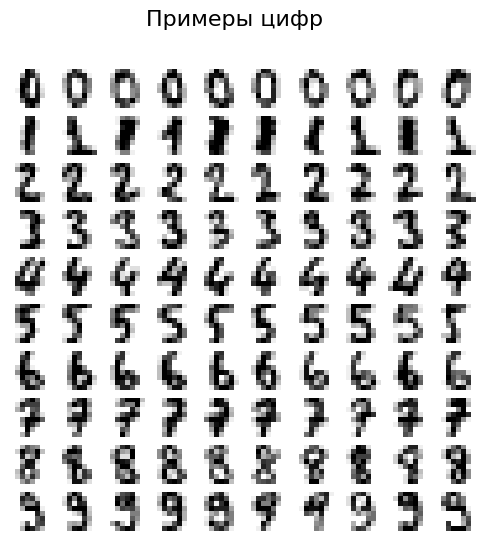

In [ ]:
#@title Примеры цифр (без преобразования)

pos = [list(np.where(y_train == i)[0][:10]) for i in range(10)]

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    # digits.image[train_ind[pos[idx // 10][idx % 10]]]
    ax.imshow(np.array(X_train)[pos[idx // 10][idx % 10]].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")

_ = fig.suptitle("Примеры цифр", fontsize=16)

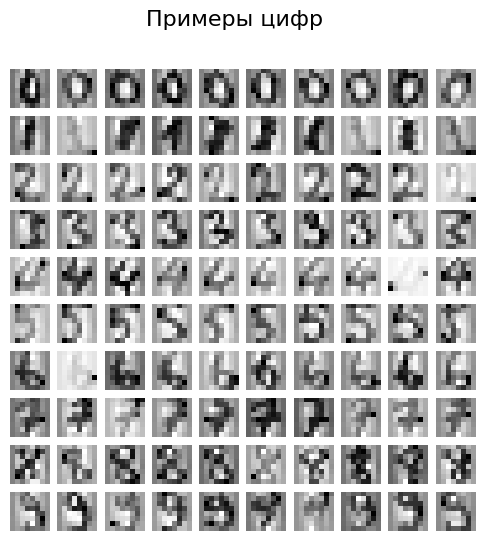

In [ ]:
#@title Примеры цифр (StandardScaler)

pos = [list(np.where(y_train == i)[0][:10]) for i in range(10)]

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    # digits.image[train_ind[pos[idx // 10][idx % 10]]]
    ax.imshow(np.array(StandardScaler().fit_transform(X_train))[pos[idx // 10][idx % 10]].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")

_ = fig.suptitle("Примеры цифр", fontsize=16)

## Уменьшение размерности

In [ ]:
#@title Лучшие результаты

colors = dict(zip([i for i in range(10)], px.colors.qualitative.Plotly))

# преобразовываем данные

X_train_pca = np.array(prince.PCA(n_components=2, engine='sklearn', random_state=42).fit_transform(X_train))
X_train_svd = np.array(TruncatedSVD(n_components=2, random_state=42).fit_transform(StandardScaler().fit_transform(X_train)))
X_train_lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_train, y_train)
X_train_iso = np.array(Isomap(n_components=2, metric='l2').fit_transform(MinMaxScaler().fit_transform(X_train)))
X_train_spe = SpectralEmbedding(n_components=2).fit_transform(X_train)
X_train_sne = TSNE(n_components=2).fit_transform(X_train)

# формируем датасет для отрисовки

df = pd.DataFrame(np.vstack((X_train_pca, X_train_svd, X_train_lda, X_train_iso, X_train_spe, X_train_sne)), columns=['PC1', 'PC2'])

n = X_train.shape[0]
df['Algorithm'] = ['PCA'] * n + ['TruncatedSVD'] * n + ['LDA'] * n + ['Isomap'] * n + ['SpectralEmbedding'] * n + ['t-SNE'] * n
df['Digit'] = [str(x) for x in y_train] * 6

fig = px.scatter(df, x='PC1', y='PC2', color='Digit', facet_col='Algorithm', facet_col_wrap=2, facet_row_spacing=0.05, facet_col_spacing=0.05)

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    height=900,
    title="Общие",
    legend_title_text="Класс"
)

fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda yaxis: yaxis.update(showticklabels=True))

fig.update_xaxes(matches=None)
fig.for_each_xaxis(lambda xaxis: xaxis.update(showticklabels=True))

fig.show()

> **Вывод**: лучшие результаты показали

* t-SNE
* Isomap
* LinearDiscriminantAnalysis

### 1. PCA (Метод главных компонент)

In [ ]:
#@title Подбираем число признаков

import prince

pca = prince.PCA(
    n_components=64,
    engine='sklearn',
    random_state=42
)

pca = pca.fit(pd.DataFrame(X_train))

fig = px.bar(x=[i+1 for i in range(64)], y=pca.cumulative_percentage_of_variance_)

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    title="Сохраняемое кол-во информации",
    xaxis_title="Число признаков",
    yaxis_title="Процентное кол-во сохраненной информации"
)

fig.show()

In [ ]:
#@title PCA

import prince

# виды масштабирования

X_train_none = prince.PCA(n_components=2, engine='sklearn', random_state=42).fit_transform(X_train)
X_train_ms1 = prince.PCA(n_components=2, engine='sklearn', random_state=42).fit_transform(pd.DataFrame(MinMaxScaler().fit_transform(X_train)))
X_train_ms2 = prince.PCA(n_components=2, engine='sklearn', random_state=42).fit_transform(pd.DataFrame(MinMaxScaler((-1, 1)).fit_transform(X_train)))
X_train_ss = prince.PCA(n_components=2, engine='sklearn', random_state=42).fit_transform(pd.DataFrame(StandardScaler().fit_transform(X_train)))

# формируем датасет для отрисовки

df = pd.DataFrame(np.vstack((X_train_none, X_train_ms1, X_train_ms2, X_train_ss)), columns=['PC1', 'PC2'])

n = X_train.shape[0]
df['TypeScaler'] = ['None'] * n + ['MinMaxScaler [0, 1]'] * n + ['MinMaxScaler [-1, 1]'] * n + ['StandardScaler'] * n
df['Digit'] = [str(x) for x in y_train] * 4

fig = px.scatter(df, x='PC1', y='PC2', color='Digit', facet_col='TypeScaler', facet_col_wrap=2, facet_row_spacing=0.15, facet_col_spacing=0.05)

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    height=600,
    title="PCA",
    legend_title_text="Класс"
)

fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda yaxis: yaxis.update(showticklabels=True))

fig.update_xaxes(matches=None)
fig.for_each_xaxis(lambda xaxis: xaxis.update(showticklabels=True))

fig.show()

> **Выводы:**

* масшабирование признаков не влияет на результаты PCA
* PCA показывает плохое разбиение по классам

### 2. TruncatedSVD

In [ ]:
#@title TruncatedSVD

# виды масштабирования

X_train_none = pd.DataFrame(np.array(TruncatedSVD(n_components=2, random_state=42).fit_transform(X_train)), columns=['PC1', 'PC2'])
X_train_ms1 = pd.DataFrame(np.array(TruncatedSVD(n_components=2, random_state=42).fit_transform(MinMaxScaler().fit_transform(X_train))), columns=['PC1', 'PC2'])
X_train_ms2 = pd.DataFrame(np.array(TruncatedSVD(n_components=2, random_state=42).fit_transform(MinMaxScaler((-1, 1)).fit_transform(X_train))), columns=['PC1', 'PC2'])
X_train_ss = pd.DataFrame(np.array(TruncatedSVD(n_components=2, random_state=42).fit_transform(StandardScaler().fit_transform(X_train))), columns=['PC1', 'PC2'])

# формируем датасет для отрисовки

df = pd.DataFrame(np.vstack((X_train_none, X_train_ms1, X_train_ms2, X_train_ss)), columns=['PC1', 'PC2'])

n = X_train.shape[0]
df['TypeScaler'] = ['None'] * n + ['MinMaxScaler [0, 1]'] * n + ['MinMaxScaler [-1, 1]'] * n + ['StandardScaler'] * n
df['Digit'] = [str(x) for x in y_train] * 4

fig = px.scatter(df, x='PC1', y='PC2', color='Digit', facet_col='TypeScaler', facet_col_wrap=2, facet_row_spacing=0.15, facet_col_spacing=0.05)

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    height=600,
    title="TruncatedSVD",
    legend_title_text="Класс"
)

fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda yaxis: yaxis.update(showticklabels=True))

fig.update_xaxes(matches=None)
fig.for_each_xaxis(lambda xaxis: xaxis.update(showticklabels=True))

fig.show()

> **Выводы:**

* масшабирование признаков влияет на результаты TruncatedSVD
* TruncatedSVD показывает плохое разбиение по классам

### 3. LinearDiscriminantAnalysis

In [ ]:
#@title LinearDiscriminantAnalysis

# виды масштабирования

X_train_none = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_train, y_train)
X_train_ms1 = LinearDiscriminantAnalysis(n_components=2).fit_transform(MinMaxScaler().fit_transform(X_train), y_train)
X_train_ms2 = LinearDiscriminantAnalysis(n_components=2).fit_transform(MinMaxScaler((-1, 1)).fit_transform(X_train), y_train)
X_train_ss = LinearDiscriminantAnalysis(n_components=2).fit_transform(StandardScaler().fit_transform(X_train), y_train)

# формируем датасет для отрисовки

df = pd.DataFrame(np.vstack((X_train_none, X_train_ms1, X_train_ms2, X_train_ss)), columns=['PC1', 'PC2'])

n = X_train.shape[0]
df['TypeScaler'] = ['None'] * n + ['MinMaxScaler [0, 1]'] * n + ['MinMaxScaler [-1, 1]'] * n + ['StandardScaler'] * n
df['Digit'] = [str(x) for x in y_train] * 4

fig = px.scatter(df, x='PC1', y='PC2', color='Digit', facet_col='TypeScaler', facet_col_wrap=2, facet_row_spacing=0.15, facet_col_spacing=0.05)

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    height=600,
    title="LinearDiscriminantAnalysis",
    legend_title_text="Класс"
)

fig.show()

> **Выводы:**

* масшабирование признаков влияет на результаты LinearDiscriminantAnalysis
* LinearDiscriminantAnalysis хорошо распознает цифры 0, 4 и 6
* LinearDiscriminantAnalysis плохо распределяет все классы

In [ ]:
#@title LinearDiscriminantAnalysis(n_components=3)

df = pd.DataFrame(LinearDiscriminantAnalysis(n_components=3).fit_transform(X_train, y_train), columns=['PC1', 'PC2', 'PC3'])

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color=[str(x) for x in y_train])

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    width=900,
    height=600,
    title="LinearDiscriminantAnalysis",
    legend_title_text="Класс"
)

fig.show()

### 4. Isomap

In [ ]:
#@title Isomap

# виды масштабирования

X_train_none = np.array(Isomap(n_components=2, metric='l2').fit_transform(X_train))
X_train_ms1 = np.array(Isomap(n_components=2, metric='l2').fit_transform(MinMaxScaler().fit_transform(X_train)))
X_train_ms2 = np.array(Isomap(n_components=2, metric='l2').fit_transform(MinMaxScaler((-1, 1)).fit_transform(X_train)))
X_train_ss = np.array(Isomap(n_components=2, metric='l2').fit_transform(StandardScaler().fit_transform(X_train)))

# формируем датасет для отрисовки

df = pd.DataFrame(np.vstack((X_train_none, X_train_ms1, X_train_ms2, X_train_ss)), columns=['PC1', 'PC2'])

n = X_train.shape[0]
df['TypeScaler'] = ['None'] * n + ['MinMaxScaler [0, 1]'] * n + ['MinMaxScaler [-1, 1]'] * n + ['StandardScaler'] * n
df['Digit'] = [str(x) for x in y_train] * 4

fig = px.scatter(df, x='PC1', y='PC2', color='Digit', facet_col='TypeScaler', facet_col_wrap=2, facet_row_spacing=0.15, facet_col_spacing=0.05)

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    height=600,
    title="Isomap",
    legend_title_text="Класс"
)

fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda yaxis: yaxis.update(showticklabels=True))

fig.update_xaxes(matches=None)
fig.for_each_xaxis(lambda xaxis: xaxis.update(showticklabels=True))

fig.show()

> **Выводы:**

* масшабирование признаков влияет на результаты Isomap и выбор метрики
* Isomap показывает хорошение разбиение по половине классов

In [ ]:
#@title Isomap(n_components=3)

df = pd.DataFrame(Isomap(n_components=3).fit_transform(MinMaxScaler().fit_transform(X_train)), columns=['PC1', 'PC2', 'PC3'])

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color=[str(x) for x in y_train])

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    width=900,
    height=600,
    title="Isomap",
    legend_title_text="Класс"
)

fig.show()

### 5. SpectralEmbedding

In [ ]:
#@title SpectralEmbedding

# виды масштабирования

X_train_none = SpectralEmbedding(n_components=2).fit_transform(X_train)
X_train_ms1 = SpectralEmbedding(n_components=2).fit_transform(MinMaxScaler().fit_transform(X_train))
X_train_ms2 = SpectralEmbedding(n_components=2).fit_transform(MinMaxScaler((-1, 1)).fit_transform(X_train))
X_train_ss = SpectralEmbedding(n_components=2).fit_transform(StandardScaler().fit_transform(X_train))

# формируем датасет для отрисовки

df = pd.DataFrame(np.vstack((X_train_none, X_train_ms1, X_train_ms2, X_train_ss)), columns=['PC1', 'PC2'])

n = X_train.shape[0]
df['TypeScaler'] = ['None'] * n + ['MinMaxScaler [0, 1]'] * n + ['MinMaxScaler [-1, 1]'] * n + ['StandardScaler'] * n
df['Digit'] = [str(x) for x in y_train] * 4

fig = px.scatter(df, x='PC1', y='PC2', color='Digit', facet_col='TypeScaler', facet_col_wrap=2, facet_row_spacing=0.15, facet_col_spacing=0.05)

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    height=600,
    title="SpectralEmbedding",
    legend_title_text="Класс"
)

fig.show()

> **Выводы:**

* масшабирование признаков не влияет на результаты SpectralEmbedding
* SpectralEmbedding показывает плохое разбиение

### 6. t-SNE

In [ ]:
#@title TSNE

# виды масштабирования

X_train_none = TSNE(n_components=2).fit_transform(X_train)
X_train_ms1 = TSNE(n_components=2).fit_transform(MinMaxScaler().fit_transform(X_train))
X_train_ms2 = TSNE(n_components=2).fit_transform(MinMaxScaler((-1, 1)).fit_transform(X_train))
X_train_ss = TSNE(n_components=2).fit_transform(StandardScaler().fit_transform(X_train))

# формируем датасет для отрисовки

df = pd.DataFrame(np.vstack((X_train_none, X_train_ms1, X_train_ms2, X_train_ss)), columns=['PC1', 'PC2'])

n = X_train.shape[0]
df['TypeScaler'] = ['None'] * n + ['MinMaxScaler [0, 1]'] * n + ['MinMaxScaler [-1, 1]'] * n + ['StandardScaler'] * n
df['Digit'] = [str(x) for x in y_train] * 4

fig = px.scatter(df, x='PC1', y='PC2', color='Digit', facet_col='TypeScaler', facet_col_wrap=2)

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    height=600,
    title="TSNE",
    legend_title_text="Класс"
)

fig.show()

## 1. Обучение (многоклассовая классификация)

### MLPClassifier (без подбора параметров)

In [ ]:
#@title MLPClassifier + TypeScaler

res1 = []
res2 = []
res3 = []
res4 = []

# получаем данные

for i in range(100):
    pipe1 = Pipeline(steps=[('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train)
    y_pred1 = pipe1.predict(X_test)
    res1.append(np.where(y_pred1 != y_test)[0].shape[0])

    pipe2 = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train)
    y_pred2 = pipe2.predict(X_test)
    res2.append(np.where(y_pred2 != y_test)[0].shape[0])

    pipe3 = Pipeline(steps=[('scaler', MinMaxScaler((-1, 1))), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train)
    y_pred3 = pipe3.predict(X_test)
    res3.append(np.where(y_pred3 != y_test)[0].shape[0])

    pipe4 = Pipeline(steps=[('scaler', StandardScaler()), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train)
    y_pred4 = pipe4.predict(X_test)
    res4.append(np.where(y_pred4 != y_test)[0].shape[0])

df = pd.DataFrame()
df['mistakes'] = res1 + res2 + res3 + res4
df['typeScaler'] = ['None' for i in range(100)] + ['MinMaxScaler [0, 1]' for i in range(100)] + ['MinMaxScaler [-1, 1]' for i in range(100)] + ['StandardScaler' for i in range(100)]

# график

fig = px.box(df, y='mistakes', x='typeScaler')

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    title="MLPClassifier + TypeScaler",
    yaxis_title="Кол-во ошибок",
    xaxis_title="TypeScaler"
)

fig.show()

In [ ]:
#@title MLPClassifier + LDA + TypeScaler

res1 = []
res2 = []
res3 = []
res4 = []

# получаем данные

for i in range(100):
    pipe1 = Pipeline(steps=[('lda', LinearDiscriminantAnalysis(n_components=9)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train)
    y_pred1 = pipe1.predict(X_test)
    res1.append(np.where(y_pred1 != y_test)[0].shape[0])

    pipe2 = Pipeline(steps=[('scaler', MinMaxScaler()), ('lda', LinearDiscriminantAnalysis(n_components=9)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train)
    y_pred2 = pipe2.predict(X_test)
    res2.append(np.where(y_pred2 != y_test)[0].shape[0])

    pipe3 = Pipeline(steps=[('scaler', MinMaxScaler((-1, 1))), ('lda', LinearDiscriminantAnalysis(n_components=9)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train)
    y_pred3 = pipe3.predict(X_test)
    res3.append(np.where(y_pred3 != y_test)[0].shape[0])

    pipe4 = Pipeline(steps=[('scaler', StandardScaler()), ('lda', LinearDiscriminantAnalysis(n_components=9)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train)
    y_pred4 = pipe4.predict(X_test)
    res4.append(np.where(y_pred4 != y_test)[0].shape[0])

df = pd.DataFrame()
df['mistakes'] = res1 + res2 + res3 + res4
df['typeScaler'] = ['None' for i in range(100)] + ['MinMaxScaler [0, 1]' for i in range(100)] + ['MinMaxScaler [-1, 1]' for i in range(100)] + ['StandardScaler' for i in range(100)]

# график

fig = px.box(df, y='mistakes', x='typeScaler')

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    title="MLPClassifier + LDA + TypeScaler",
    yaxis_title="Кол-во ошибок",
    xaxis_title="TypeScaler"
)

fig.show()

In [ ]:
#@title MLPClassifier + Isomap + TypeScaler

res1 = []
res2 = []
res3 = []
res4 = []

# получаем данные

for i in range(100):
    pipe1 = Pipeline(steps=[('isomap', Isomap(n_components=32)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train)
    y_pred1 = pipe1.predict(X_test)
    res1.append(np.where(y_pred1 != y_test)[0].shape[0])

    pipe2 = Pipeline(steps=[('scaler', MinMaxScaler()), ('isomap', Isomap(n_components=32)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train)
    y_pred2 = pipe2.predict(X_test)
    res2.append(np.where(y_pred2 != y_test)[0].shape[0])

    pipe3 = Pipeline(steps=[('scaler', MinMaxScaler((-1, 1))), ('isomap', Isomap(n_components=32)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train)
    y_pred3 = pipe3.predict(X_test)
    res3.append(np.where(y_pred3 != y_test)[0].shape[0])

    pipe4 = Pipeline(steps=[('scaler', StandardScaler()), ('isomap', Isomap(n_components=32)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train)
    y_pred4 = pipe4.predict(X_test)
    res4.append(np.where(y_pred4 != y_test)[0].shape[0])

df = pd.DataFrame()
df['mistakes'] = res1 + res2 + res3 + res4
df['typeScaler'] = ['None' for i in range(100)] + ['MinMaxScaler [0, 1]' for i in range(100)] + ['MinMaxScaler [-1, 1]' for i in range(100)] + ['StandardScaler' for i in range(100)]

# график

fig = px.box(df, y='mistakes', x='typeScaler')

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    title="MLPClassifier + Isomap + TypeScaler",
    yaxis_title="Кол-во ошибок",
    xaxis_title="TypeScaler"
)

fig.show()

#### Итоговая модель

In [ ]:
#@title Создаем Pipeline

pipe = Pipeline(steps=[('scaler', MinMaxScaler((-1, 1))), ('estimator',MLPClassifier(max_iter=1000))]).fit(X_train, y_train)
pipe

Pipeline(steps=[('scaler', MinMaxScaler(feature_range=(-1, 1))),
                ('estimator', MLPClassifier(max_iter=1000))])

In [ ]:
#@title Обучающая выборка

y_pred = pipe.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       136
           2       1.00      1.00      1.00       133
           3       1.00      1.00      1.00       137
           4       1.00      1.00      1.00       136
           5       1.00      1.00      1.00       136
           6       1.00      1.00      1.00       136
           7       1.00      1.00      1.00       134
           8       1.00      1.00      1.00       131
           9       1.00      1.00      1.00       135

    accuracy                           1.00      1347
   macro avg       1.00      1.00      1.00      1347
weighted avg       1.00      1.00      1.00      1347



In [ ]:
#@title Тестовая выборка

y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.94      0.98      0.96        46
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        46
           4       0.98      1.00      0.99        45
           5       0.98      0.98      0.98        46
           6       1.00      0.96      0.98        45
           7       1.00      1.00      1.00        45
           8       0.95      0.93      0.94        43
           9       0.98      1.00      0.99        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [ ]:
#@title Визуализация ошибок

classes = pipe[-1].classes_
fig = px.imshow(confusion_matrix(y_test, y_pred), x=classes, y=classes, color_continuous_scale=['#ffffff', '#23c552', '#23c552', '#23c552', '#23c552', '#23c552'], text_auto=True)

fig.update_layout(width=700, height=700)
fig.show()

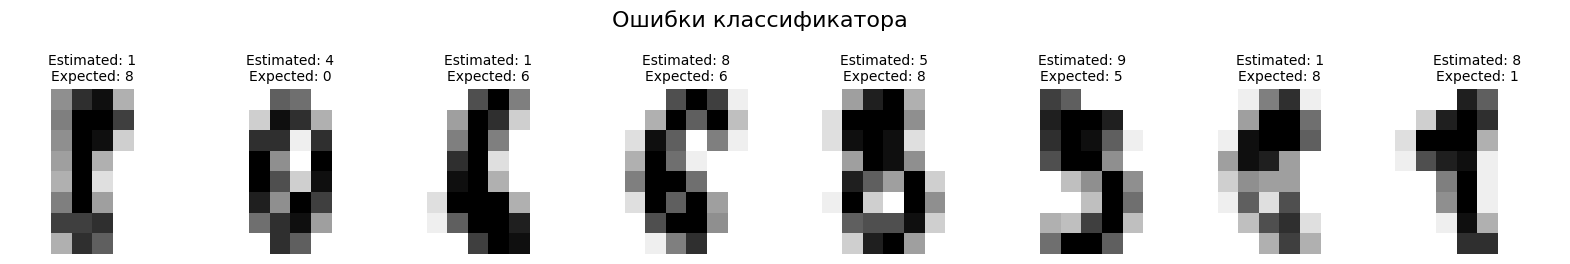

In [ ]:
#@title Ошибки классификатора

# позиции ошибок

pos = []

for i in range(len(y_test)):
    if (y_test[i] != y_pred[i]):
        pos.append(i)

# визуализация ошибок

# Создаем фигуру и подграфики
fig, axes = plt.subplots(1, 8, figsize=(20, 4))

# Проходимся по каждому подграфику и добавляем imshow и заголовок
for i, ax in enumerate(axes):
    ax.imshow(np.array(X_test)[pos[i]].reshape((8, 8)), cmap=plt.cm.binary)
    ax.set_title(f'Estimated: {y_pred[pos[i]]}\nExpected: {y_test[pos[i]]}', fontsize=10)
    ax.axis("off")

fig.suptitle('Ошибки классификатора', fontsize=16, y=0.9)
fig.show()

### MLPClassifier (с подбором параметров)

#### Использование TPOTClassifier (подбор гиперпараметров на основе генетических алгоритмов)

In [ ]:
#@title Создание класса TPOTClassifier

from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=10,
                      population_size=25,
                      verbosity=3,
                      config_dict = {'sklearn.neural_network.MLPClassifier': {
                          'hidden_layer_sizes': [(64,), (128,), (256,)],
                          'activation': ['relu', 'tanh'],
                          'solver': ['lbfgs', 'adam', 'sgd'],
                          'alpha': np.geomspace(0.0001, 1, num=5),
                          }})

tpot

TPOTClassifier(config_dict={'sklearn.neural_network.MLPClassifier': {'activation': ['relu',
                                                                                    'tanh'],
                                                                     'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                                                                     'hidden_layer_sizes': [(64,),
                                                                                            (128,),
                                                                                            (256,)],
                                                                     'solver': ['lbfgs',
                                                                                'adam',
                                                                                'sgd']}},
               generations=10, population_size=25, verbosity=3)

In [ ]:
#@title Подбор гиперпараметров

scaler = MinMaxScaler((-1, 1)).fit(X_train)
X_train1 = scaler.transform(X_train)
X_test1 = scaler.transform(X_test)

tpot.fit(X_train1, y_train)
print(f'Test score = {tpot.score(X_test1, y_test)}')

1 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/275 [00:00<?, ?pipeline/s]

_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	0.9844031391986782	MLPClassifier(CombineDFs(input_matrix, input_matrix), MLPClassifier__activation=relu, MLPClassifier__alpha=0.01, MLPClassifier__hidden_layer_sizes=(256,), MLPClassifier__solver=adam)
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 2 - Current Pareto front scores:

-1	0.9844031391986782	MLPClassifier(C

In [ ]:
#@title Создаем Pipeline

pipe = Pipeline(steps=[('scaler', MinMaxScaler((-1, 1))), ('estimator',MLPClassifier(alpha=0.01, hidden_layer_sizes=(256,), max_iter=1000,
                               solver='adam'))])
pipe

Pipeline(steps=[('scaler', MinMaxScaler(feature_range=(-1, 1))),
                ('estimator',
                 MLPClassifier(alpha=0.01, hidden_layer_sizes=(256,),
                               max_iter=1000))])

In [ ]:
#@title MLPClassifier + MinMaxScaler(-1, 1) + TPOTClassifier

res1 = []

# получаем данные

for i in range(25):
    pipe1 = pipe.fit(X_train, y_train)
    y_pred1 = pipe1.predict(X_test)
    res1.append(np.where(y_pred1 != y_test)[0].shape[0])

df = pd.DataFrame()
df['mistakes'] = res1

# график

fig = px.box(df, x='mistakes')

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    title="MLPClassifier + MinMaxScaler(-1, 1) + TPOTClassifier",
    xaxis_title="Кол-во ошибок"
)

fig.show()

In [ ]:
#@title Обучающая выборка

y_pred = pipe.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       136
           2       1.00      1.00      1.00       133
           3       1.00      1.00      1.00       137
           4       1.00      1.00      1.00       136
           5       1.00      1.00      1.00       136
           6       1.00      1.00      1.00       136
           7       1.00      1.00      1.00       134
           8       1.00      1.00      1.00       131
           9       1.00      1.00      1.00       135

    accuracy                           1.00      1347
   macro avg       1.00      1.00      1.00      1347
weighted avg       1.00      1.00      1.00      1347



In [ ]:
#@title Тестовая выборка

y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.96      0.98      0.97        46
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        46
           4       0.98      1.00      0.99        45
           5       1.00      0.98      0.99        46
           6       0.96      0.98      0.97        45
           7       1.00      1.00      1.00        45
           8       0.98      0.93      0.95        43
           9       0.98      1.00      0.99        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [ ]:
#@title Визуализация ошибок

classes = pipe[-1].classes_
fig = px.imshow(confusion_matrix(y_test, y_pred), x=classes, y=classes, color_continuous_scale=['#ffffff', '#23c552', '#23c552', '#23c552', '#23c552', '#23c552'], text_auto=True)

fig.update_layout(width=700, height=700)
fig.show()

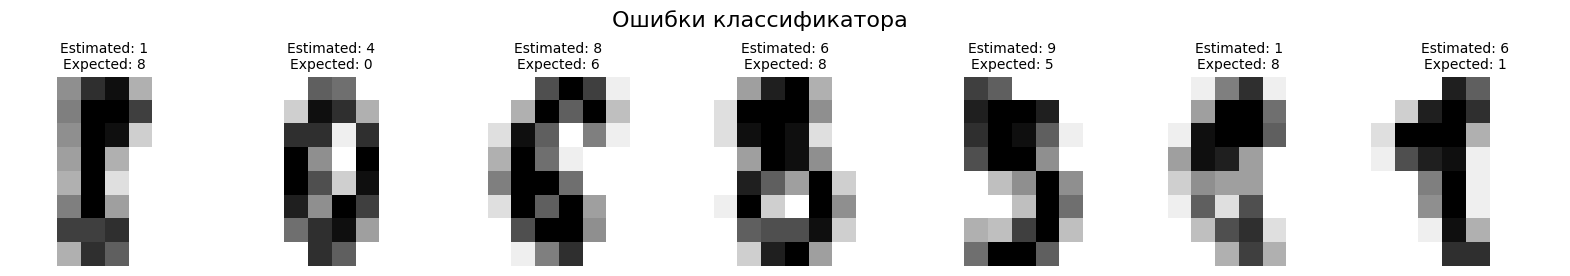

In [ ]:
#@title Ошибки классификатора

# позиции ошибок

pos = []

for i in range(len(y_test)):
    if (y_test[i] != y_pred[i]):
        pos.append(i)

# визуализация ошибок

# Создаем фигуру и подграфики
fig, axes = plt.subplots(1, 7, figsize=(20, 4))

# Проходимся по каждому подграфику и добавляем imshow и заголовок
for i, ax in enumerate(axes):
    ax.imshow(np.array(X_test)[pos[i]].reshape((8, 8)), cmap=plt.cm.binary)
    ax.set_title(f'Estimated: {y_pred[pos[i]]}\nExpected: {y_test[pos[i]]}', fontsize=10)
    ax.axis("off")

fig.suptitle('Ошибки классификатора', fontsize=16, y=0.9)
fig.show()

#### Использование GridSearchCV

In [ ]:
#@title Создаем Pipeline

pipe = Pipeline(steps=[('scaler', MinMaxScaler((-1, 1))), ('estimator',MLPClassifier(max_iter=1000))]).fit(X_train, y_train)
pipe

Pipeline(steps=[('scaler', MinMaxScaler(feature_range=(-1, 1))),
                ('estimator', MLPClassifier(max_iter=1000))])

In [ ]:
#@title Подбор гиперпараметров

param_grid = {
    'estimator__alpha': np.geomspace(0.0001, 1, num=5),
    'estimator__activation': ['tanh', 'relu'],
    'estimator__hidden_layer_sizes': [(64,), (128,), (256,)],
    'estimator__solver': ['lbfgs', 'sgd', 'adam']
}

grid = GridSearchCV(pipe, param_grid, verbose=3)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.978 total time=   0.2s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.967 total time=   0.2s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.944 total time=   0.2s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.974 total time=   0.4s
[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.970 total time=   0.2s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.981

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.952 total time=  12.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.981 total time=  14.2s
[CV 5/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.952 total time=  13.4s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.989 total time=   3.9s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.963 total time=   7.4s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.955 total time=   3.1s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.985 total time=   3.6s
[CV 5/5] END estimator__activation=tanh, estimator__alpha=1.0, est

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.985 total time=  23.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.959 total time=  20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.952 total time=  20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.974 total time=  23.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.959 total time=  20.3s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.985 total time=   6.1s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.967 total time=   7.0s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.952 total time=   4.6s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.978 total time=   7.6s
[CV 5/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.959 total time=   5.2s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=  38.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.963 total time=  35.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.948 total time=  37.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.974 total time=  36.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.955 total time=  36.1s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   7.9s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.967 total time=   5.7s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.952 total time=   9.8s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.978 total time=   6.2s
[CV 5/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.959 total time=   9.2s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.989 total time=  14.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.959 total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.955 total time=  12.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.974 total time=  12.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.963 total time=  12.2s
[CV 1/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.989 total time=   3.7s
[CV 2/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.967 total time=   3.4s
[CV 3/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.959 total time=   2.2s
[CV 4/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.981 total time=   3.9s
[CV 5/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.981 total time=   4.5s
[CV 1/5] END estimator__activation=relu, estimator__alpha=1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=  19.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.963 total time=  18.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.959 total time=  18.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.981 total time=  18.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.967 total time=  20.4s
[CV 1/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   4.0s
[CV 2/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.963 total time=   3.8s
[CV 3/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.963 total time=   3.1s
[CV 4/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.981 total time=   6.8s
[CV 5/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.974 total time=   3.0s
{'estimator__activation': 'relu', 'estimator__alpha': 1.0, 

In [ ]:
#@title Создаем Pipeline

pipe = Pipeline(steps=[('estimator',MLPClassifier(alpha=1, hidden_layer_sizes=(128,), max_iter=1000,
                               solver='lbfgs'))]).fit(X_train, y_train)
pipe

Pipeline(steps=[('estimator',
                 MLPClassifier(alpha=1, hidden_layer_sizes=(128,),
                               max_iter=1000, solver='lbfgs'))])

In [ ]:
#@title Обучающая выборка

y_pred = pipe.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       136
           2       1.00      1.00      1.00       133
           3       1.00      1.00      1.00       137
           4       1.00      1.00      1.00       136
           5       1.00      1.00      1.00       136
           6       1.00      1.00      1.00       136
           7       1.00      1.00      1.00       134
           8       1.00      1.00      1.00       131
           9       1.00      1.00      1.00       135

    accuracy                           1.00      1347
   macro avg       1.00      1.00      1.00      1347
weighted avg       1.00      1.00      1.00      1347



In [ ]:
#@title Тестовая выборка

y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.96      0.98      0.97        46
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        46
           4       0.98      1.00      0.99        45
           5       1.00      0.98      0.99        46
           6       1.00      0.98      0.99        45
           7       1.00      1.00      1.00        45
           8       0.95      0.95      0.95        43
           9       0.98      1.00      0.99        45

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [ ]:
#@title Визуализация ошибок

classes = pipe[-1].classes_
fig = px.imshow(confusion_matrix(y_test, y_pred), x=classes, y=classes, color_continuous_scale=['#ffffff', '#23c552', '#23c552', '#23c552', '#23c552', '#23c552'], text_auto=True)

fig.update_layout(width=700, height=700)
fig.show()

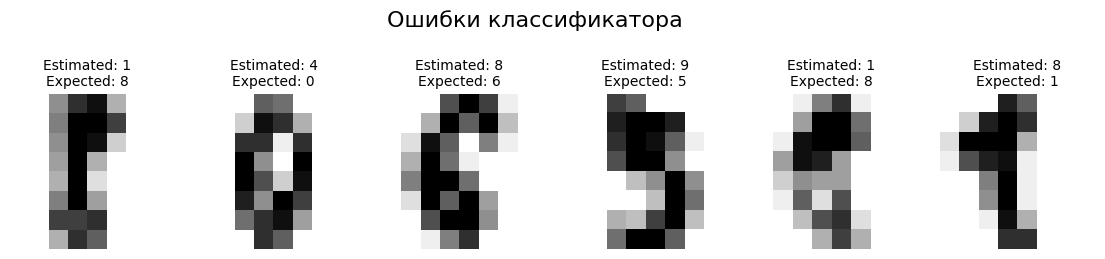

In [ ]:
#@title Ошибки классификатора

# позиции ошибок

pos = []

for i in range(len(y_test)):
    if (y_test[i] != y_pred[i]):
        pos.append(i)

# визуализация ошибок

# Создаем фигуру и подграфики
fig, axes = plt.subplots(1, 6, figsize=(14, 4))

# Проходимся по каждому подграфику и добавляем imshow и заголовок
for i, ax in enumerate(axes):
    ax.imshow(np.array(X_test)[pos[i]].reshape((8, 8)), cmap=plt.cm.binary)
    ax.set_title(f'Estimated: {y_pred[pos[i]]}\nExpected: {y_test[pos[i]]}', fontsize=10)
    ax.axis("off")

fig.suptitle('Ошибки классификатора', fontsize=16, y=0.9)
fig.show()

In [ ]:
#@title MLPClassifier + MinMaxScaler(-1, 1) + GridSearchCV

res1 = []

# получаем данные

for i in range(25):
    pipe1 = pipe.fit(X_train, y_train)
    y_pred1 = pipe1.predict(X_test)
    res1.append(np.where(y_pred1 != y_test)[0].shape[0])

df = pd.DataFrame()
df['mistakes'] = res1

# график

fig = px.box(df, x='mistakes')

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    title="MLPClassifier + MinMaxScaler(-1, 1) + GridSearchCV",
    xaxis_title="Кол-во ошибок"
)

fig.show()

## 2. Обучение (бинарная классификация: четные и нечетные)

In [ ]:
#@title Обновляем значения целевых признаков (классы 0 или 1)

y_train1 = y_train % 2
y_test1 = y_test % 2

### MLPClassifier (без подбора параметров)

In [ ]:
#@title MLPClassifier + TypeScaler

res1 = []
res2 = []
res3 = []
res4 = []

# получаем данные

for i in range(100):
    pipe1 = Pipeline(steps=[('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train1)
    y_pred1 = pipe1.predict(X_test)
    res1.append(np.where(y_pred1 != y_test1)[0].shape[0])

    pipe2 = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train1)
    y_pred2 = pipe2.predict(X_test)
    res2.append(np.where(y_pred2 != y_test1)[0].shape[0])

    pipe3 = Pipeline(steps=[('scaler', MinMaxScaler((-1, 1))), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train1)
    y_pred3 = pipe3.predict(X_test)
    res3.append(np.where(y_pred3 != y_test1)[0].shape[0])

    pipe4 = Pipeline(steps=[('scaler', StandardScaler()), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train1)
    y_pred4 = pipe4.predict(X_test)
    res4.append(np.where(y_pred4 != y_test1)[0].shape[0])

df = pd.DataFrame()
df['mistakes'] = res1 + res2 + res3 + res4
df['typeScaler'] = ['None' for i in range(100)] + ['MinMaxScaler [0, 1]' for i in range(100)] + ['MinMaxScaler [-1, 1]' for i in range(100)] + ['StandardScaler' for i in range(100)]

# график

fig = px.box(df, y='mistakes', x='typeScaler')

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    title="MLPClassifier + TypeScaler",
    yaxis_title="Кол-во ошибок",
    xaxis_title="TypeScaler"
)

fig.show()

In [ ]:
#@title MLPClassifier + Isomap + TypeScaler

res1 = []
res2 = []
res3 = []
res4 = []

# получаем данные

for i in range(100):
    pipe1 = Pipeline(steps=[('isomap', Isomap(n_components=32)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train1)
    y_pred1 = pipe1.predict(X_test)
    res1.append(np.where(y_pred1 != y_test1)[0].shape[0])

    pipe2 = Pipeline(steps=[('scaler', MinMaxScaler()), ('isomap', Isomap(n_components=32)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train1)
    y_pred2 = pipe2.predict(X_test)
    res2.append(np.where(y_pred2 != y_test1)[0].shape[0])

    pipe3 = Pipeline(steps=[('scaler', MinMaxScaler((-1, 1))), ('isomap', Isomap(n_components=32)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train1)
    y_pred3 = pipe3.predict(X_test)
    res3.append(np.where(y_pred3 != y_test1)[0].shape[0])

    pipe4 = Pipeline(steps=[('scaler', StandardScaler()), ('isomap', Isomap(n_components=32)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train1)
    y_pred4 = pipe4.predict(X_test)
    res4.append(np.where(y_pred4 != y_test1)[0].shape[0])

df = pd.DataFrame()
df['mistakes'] = res1 + res2 + res3 + res4
df['typeScaler'] = ['None' for i in range(100)] + ['MinMaxScaler [0, 1]' for i in range(100)] + ['MinMaxScaler [-1, 1]' for i in range(100)] + ['StandardScaler' for i in range(100)]

# график

fig = px.box(df, y='mistakes', x='typeScaler')

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    title="MLPClassifier + Isomap + TypeScaler",
    yaxis_title="Кол-во ошибок",
    xaxis_title="TypeScaler"
)

fig.show()

#### Итоговая модель

In [ ]:
#@title Создаем Pipeline

pipe = Pipeline(steps=[('isomap', Isomap(n_components=32)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train1)
pipe

Pipeline(steps=[('isomap', Isomap(n_components=32)),
                ('estimator', MLPClassifier(max_iter=1000))])

In [ ]:
#@title Обучающая выборка

y_pred = pipe.predict(X_train)
print(classification_report(y_train1, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       669
           1       1.00      1.00      1.00       678

    accuracy                           1.00      1347
   macro avg       1.00      1.00      1.00      1347
weighted avg       1.00      1.00      1.00      1347



In [ ]:
#@title Тестовая выборка

y_pred = pipe.predict(X_test)
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       222
           1       0.98      1.00      0.99       228

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [ ]:
#@title Визуализация ошибок

classes = pipe[-1].classes_
fig = px.imshow(confusion_matrix(y_test1, y_pred), x=classes, y=classes, color_continuous_scale=['#ffffff', '#23c552', '#23c552', '#23c552', '#23c552', '#23c552'], text_auto=True)

fig.update_layout(width=400, height=400)
fig.show()

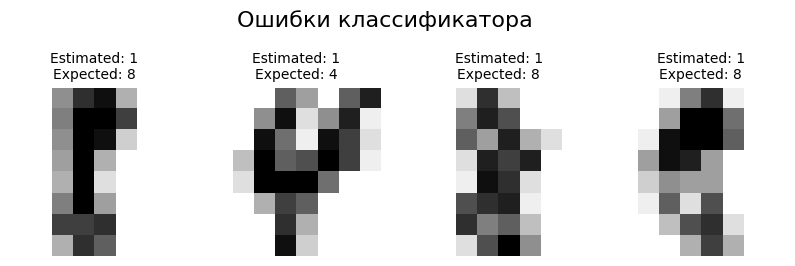

In [ ]:
#@title Ошибки классификатора

# позиции ошибок

pos = []

for i in range(len(y_test)):
    if (y_test1[i] != y_pred[i]):
        pos.append(i)

# визуализация ошибок

# Создаем фигуру и подграфики
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

# Проходимся по каждому подграфику и добавляем imshow и заголовок
for i, ax in enumerate(axes):
    ax.imshow(np.array(X_test)[pos[i]].reshape((8, 8)), cmap=plt.cm.binary)
    ax.set_title(f'Estimated: {y_pred[pos[i]]}\nExpected: {y_test[pos[i]]}', fontsize=10)
    ax.axis("off")

fig.suptitle('Ошибки классификатора', fontsize=16, y=0.9)
fig.show()

### MLPClassifier (с подбором параметров)

#### Использование GridSearchCV

In [ ]:
#@title Создаем Pipeline

pipe = Pipeline(steps=[('isomap', Isomap(n_components=32)), ('estimator',MLPClassifier(max_iter=1000))]).fit(X_train, y_train1)
pipe

Pipeline(steps=[('isomap', Isomap(n_components=32)),
                ('estimator', MLPClassifier(max_iter=1000))])

In [ ]:
#@title Подбор гиперпараметров

param_grid = {
    'estimator__alpha': np.geomspace(0.0001, 1, num=5),
    'estimator__activation': ['tanh', 'relu'],
    'estimator__hidden_layer_sizes': [(64,), (128,), (256,)],
    'estimator__solver': ['lbfgs', 'sgd', 'adam']
}

grid = GridSearchCV(pipe, param_grid, verbose=3)
grid.fit(X_train, y_train1)

print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   3.7s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.970 total time=   2.7s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.989 total time=   3.2s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.978 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.993 total time=   3.9s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.970 total time=   4.6s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.970 total time=   4.0s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.989 total time=   6.1s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.963 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.970 total time=   3.6s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.985 total time=   2.5s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.981 total time=   4.4s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.993 total time=   3.5s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.989 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.985 total time=   2.7s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.993 total time=   1.4s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.989 total time=   1.2s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.985 total time=   1.9s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.978 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.989 total time=   2.5s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.963 total time=   9.3s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.981 total time=   9.8s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.985 total time=   4.8s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.989 total time=   7.6s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.981 total time=   4.1s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.981 total time=   3.0s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.978 total time=   4.3s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.981 total time=   3.5s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.985 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.967 total time=   3.5s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.989 total time=   1.6s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.989 total time=   1.5s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   4.0s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.981 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.981 total time=   1.8s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.978 total time=   5.8s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.978 total time=   9.0s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.989 total time=   6.1s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.989 total time=   8.3s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.981 total time=   5.6s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.985 total time=   3.2s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.981 total time=   5.2s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.981 total time=   2.8s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.981 total time=   3.1s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.978 total time=   1.2s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   1.9s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.989 total time=   2.3s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.978 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.981 total time=   1.4s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.963 total time=   4.7s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.978 total time=   6.9s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.985 total time=   4.4s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.974 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.974 total time=   3.7s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.978 total time=   4.3s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.974 total time=   2.5s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.981 total time=   2.5s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.981 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.974 total time=   2.5s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.989 total time=   1.9s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.981 total time=   2.0s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.993 total time=   1.9s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.978 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.985 total time=   1.4s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.959 total time=   4.7s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.981 total time=   8.4s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.989 total time=   5.7s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.985 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.978 total time=   7.5s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.981 total time=   2.8s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.978 total time=   2.5s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.985 total time=   2.8s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.993 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.989 total time=   4.0s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.989 total time=   1.6s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.981 total time=   1.4s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.981 total time=   1.6s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.989 total time=   2.0s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.993 total time=   8.7s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.989 total time=   5.6s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.989 total time=   8.4s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.981 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.989 total time=   8.2s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.985 total time=   3.6s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   2.7s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   2.7s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.985 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.978 total time=   3.8s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   1.3s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.978 total time=   1.2s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   1.5s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.978 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.978 total time=   1.6s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.974 total time=   7.1s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.967 total time=   4.1s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.989 total time=   4.1s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.978 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.974 total time=   4.4s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.974 total time=   3.0s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.985 total time=   2.7s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.996 total time=   4.1s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.981 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.970 total time=   2.6s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.989 total time=   1.2s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.981 total time=   1.3s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.989 total time=   1.9s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.981 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.985 total time=   2.7s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.956 total time=   5.7s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.981 total time=   4.5s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.985 total time=   7.4s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.981 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.985 total time=   4.4s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.985 total time=   4.4s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.978 total time=   3.3s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.989 total time=   2.9s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.993 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.974 total time=   2.6s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   2.4s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.981 total time=   2.6s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.989 total time=   2.3s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.981 total time=   2.1s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.989 total time=   7.3s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=   7.1s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.974 total time=   6.2s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=   6.2s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.985 total time=   5.5s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.981 total time=   3.0s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   3.3s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.985 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.985 total time=   5.2s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.993 total time=   2.4s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   1.8s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   2.3s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.981 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   2.8s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.956 total time=   6.2s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.985 total time=   4.2s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.974 total time=   3.8s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.993 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.970 total time=   3.6s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.981 total time=   2.9s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.974 total time=   2.6s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.989 total time=   4.9s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.970 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.981 total time=   3.0s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.989 total time=   4.1s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.985 total time=   3.1s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.985 total time=   4.1s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.978 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.981 total time=   2.6s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.967 total time=   5.4s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.985 total time=   6.7s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.981 total time=   4.8s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.985 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.974 total time=   4.5s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.989 total time=   3.6s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.981 total time=   3.9s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.989 total time=   4.8s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.993 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.985 total time=   2.9s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.989 total time=   3.0s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.981 total time=   3.7s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   3.9s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   4.1s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.967 total time=   7.8s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.989 total time=   5.9s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.989 total time=   8.0s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.993 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.981 total time=   8.4s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   4.1s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.981 total time=   3.5s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   5.7s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.985 total time=   3.9s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.993 total time=   2.4s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   3.7s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   3.6s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.978 total time=   3.1s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.981 total time=   8.1s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.981 total time=   6.0s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.981 total time=   7.4s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.981 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.970 total time=   5.5s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.993 total time=   6.4s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.981 total time=   4.2s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.993 total time=   3.9s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.981 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.978 total time=   3.4s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.993 total time=   3.0s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.981 total time=   2.6s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.985 total time=   6.3s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.989 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.989 total time=   4.5s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.989 total time=  10.7s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.989 total time=  10.1s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.985 total time=   7.9s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.985 total time=  10.9s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.981 total time=   7.8s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.989 total time=   7.6s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.981 total time=   4.6s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.993 total time=   7.6s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.981 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.985 total time=   4.0s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.989 total time=   5.4s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.989 total time=   5.4s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   6.8s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   8.9s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   6.2s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.989 total time=  15.2s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.981 total time=  15.3s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.989 total time=  14.7s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=  15.6s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=  16.0s
[CV 1/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   8.8s
[CV 2/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   5.7s
[CV 3/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   8.2s
[CV 4/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.981 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=tanh, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.981 total time=   9.2s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.989 total time=   1.0s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   0.9s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   1.0s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   1.0s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.985 total time=   1.3s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.981 total time=   1.2s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.993 total time=   1.7s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.989 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.981 total time=   2.0s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.993 total time=   1.4s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.978 total time=   1.2s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.989 total time=   1.6s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.985 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.967 total time=   1.6s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.993 total time=   1.1s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.985 total time=   0.9s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.989 total time=   1.6s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.985 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.978 total time=   1.8s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.993 total time=   1.7s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.974 total time=   1.3s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.989 total time=   1.6s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.981 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.978 total time=   1.6s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.993 total time=   1.4s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.970 total time=   2.3s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.996 total time=   2.8s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.985 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.989 total time=   1.9s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.989 total time=   1.2s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.981 total time=   1.2s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.981 total time=   1.3s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.978 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.978 total time=   1.3s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.993 total time=   3.6s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.981 total time=   2.5s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=   2.3s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.981 total time=   2.4s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   2.0s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.985 total time=   1.5s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.985 total time=   3.7s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.985 total time=   2.0s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.989 total time=   1.0s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   0.9s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.989 total time=   0.9s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.978 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   1.0s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.993 total time=   1.2s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.981 total time=   1.8s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.985 total time=   2.9s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.989 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.974 total time=   1.5s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.981 total time=   1.5s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.978 total time=   1.4s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.993 total time=   1.4s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.989 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.978 total time=   1.8s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.996 total time=   1.5s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.981 total time=   1.5s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.989 total time=   1.6s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.978 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.985 total time=   1.1s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.993 total time=   1.5s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.981 total time=   1.3s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.985 total time=   1.9s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.985 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.985 total time=   1.5s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.989 total time=   2.5s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.981 total time=   2.3s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.981 total time=   1.8s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.981 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.981 total time=   1.4s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.993 total time=   1.2s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   1.2s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   1.3s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.978 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   1.3s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.989 total time=   3.7s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.981 total time=   2.2s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.989 total time=   2.1s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.978 total time=   2.1s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   1.7s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.981 total time=   1.3s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   2.9s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.978 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.981 total time=   2.0s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.981 total time=   1.0s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.978 total time=   0.9s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   1.0s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.970 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.981 total time=   1.0s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.993 total time=   1.5s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.981 total time=   1.1s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.981 total time=   2.7s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.985 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.970 total time=   1.9s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.989 total time=   1.3s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.985 total time=   1.5s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.989 total time=   1.5s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.985 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.978 total time=   1.5s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.985 total time=   1.0s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.978 total time=   1.3s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.993 total time=   1.7s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.985 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.981 total time=   1.4s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.989 total time=   2.4s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.981 total time=   2.3s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.985 total time=   2.1s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.985 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.989 total time=   2.0s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.989 total time=   2.5s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.974 total time=   2.4s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.985 total time=   1.4s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.974 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.974 total time=   1.7s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.989 total time=   1.3s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.981 total time=   1.2s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.989 total time=   1.2s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.981 total time=   2.2s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=   3.3s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=   1.3s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.993 total time=   2.0s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=   2.0s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.981 total time=   1.6s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.981 total time=   1.9s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.981 total time=   3.6s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.974 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.981 total time=   1.7s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.993 total time=   1.1s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.981 total time=   1.2s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.981 total time=   1.3s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.981 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.981 total time=   1.5s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.985 total time=   2.0s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.985 total time=   2.6s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.989 total time=   1.8s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.985 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.974 total time=   1.6s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.981 total time=   1.4s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.978 total time=   1.2s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.978 total time=   1.4s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.978 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.978 total time=   2.1s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.993 total time=   1.9s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.981 total time=   1.5s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.985 total time=   1.9s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.985 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.985 total time=   2.0s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.993 total time=   1.6s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.989 total time=   1.3s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.985 total time=   1.5s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.970 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.985 total time=   3.2s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.978 total time=   1.5s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.985 total time=   1.2s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.981 total time=   1.6s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.981 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.978 total time=   1.8s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.993 total time=   1.3s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   1.7s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.989 total time=   4.3s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.981 total time=   2.6s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.993 total time=   1.9s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=   1.5s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=   3.6s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.974 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.981 total time=   2.1s
[CV 1/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   2.4s
[CV 2/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.978 total time=   1.6s
[CV 3/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   1.9s
[CV 4/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.978 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=0.1, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.981 total time=   4.2s
[CV 1/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.989 total time=   2.4s
[CV 2/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.981 total time=   1.7s
[CV 3/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   2.2s
[CV 4/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.985 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=lbfgs;, score=0.981 total time=   2.3s
[CV 1/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.989 total time=   4.2s
[CV 2/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.974 total time=   1.7s
[CV 3/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.985 total time=   3.0s
[CV 4/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.985 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=sgd;, score=0.978 total time=   5.0s
[CV 1/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.981 total time=   4.9s
[CV 2/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.981 total time=   3.6s
[CV 3/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.989 total time=   3.8s
[CV 4/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.981 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(64,), estimator__solver=adam;, score=0.985 total time=   4.2s
[CV 1/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.996 total time=   2.4s
[CV 2/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.981 total time=   1.9s
[CV 3/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.985 total time=   7.0s
[CV 4/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.985 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=lbfgs;, score=0.981 total time=   3.2s
[CV 1/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.996 total time=   4.2s
[CV 2/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.978 total time=   4.6s
[CV 3/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.989 total time=   3.9s
[CV 4/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.989 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=sgd;, score=0.985 total time=   7.9s
[CV 1/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.989 total time=   4.2s
[CV 2/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.981 total time=   4.0s
[CV 3/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.985 total time=   8.0s
[CV 4/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.985 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(128,), estimator__solver=adam;, score=0.985 total time=   4.2s
[CV 1/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.996 total time=   7.8s
[CV 2/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   2.7s
[CV 3/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=   6.4s
[CV 4/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.989 total time=  12.4s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=lbfgs;, score=0.985 total time=  11.1s
[CV 1/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.993 total time=   6.2s
[CV 2/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.989 total time=   7.8s
[CV 3/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=   7.3s
[CV 4/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.981 total time=  13.4s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=sgd;, score=0.985 total time=  11.1s
[CV 1/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.989 total time=   5.5s
[CV 2/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.985 total time=   6.5s
[CV 3/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.993 total time=   6.9s
[CV 4/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.978 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



[CV 5/5] END estimator__activation=relu, estimator__alpha=1.0, estimator__hidden_layer_sizes=(256,), estimator__solver=adam;, score=0.985 total time=   8.4s
{'estimator__activation': 'tanh', 'estimator__alpha': 0.001, 'estimator__hidden_layer_sizes': (256,), 'estimator__solver': 'sgd'}
Pipeline(steps=[('isomap', Isomap(n_components=32)),
                ('estimator',
                 MLPClassifier(activation='tanh', alpha=0.001,
                               hidden_layer_sizes=(256,), max_iter=1000,
                               solver='sgd'))])


In [ ]:
#@title Создаем Pipeline

pipe = Pipeline(steps=[('isomap', Isomap(n_components=32)),
                       ('estimator', MLPClassifier(activation='tanh', alpha=0.001,
                                                   hidden_layer_sizes=(256,), max_iter=1000,
                                                   solver='sgd'))]).fit(X_train, y_train1)
pipe

Pipeline(steps=[('isomap', Isomap(n_components=32)),
                ('estimator',
                 MLPClassifier(activation='tanh', alpha=0.001,
                               hidden_layer_sizes=(256,), max_iter=1000,
                               solver='sgd'))])

In [ ]:
#@title MLPClassifier + Isomap(32) + GridSearchCV

res1 = []

# получаем данные

for i in range(25):
    pipe1 = pipe.fit(X_train, y_train1)
    y_pred1 = pipe1.predict(X_test)
    res1.append(np.where(y_pred1 != y_test1)[0].shape[0])

df = pd.DataFrame()
df['mistakes'] = res1

# график

fig = px.box(df, x='mistakes')

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    title="MLPClassifier + Isomap(32) + GridSearchCV",
    xaxis_title="Кол-во ошибок"
)

fig.show()

In [ ]:
#@title Обучающая выборка

y_pred = pipe.predict(X_train)
print(classification_report(y_train1, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       669
           1       1.00      1.00      1.00       678

    accuracy                           1.00      1347
   macro avg       1.00      1.00      1.00      1347
weighted avg       1.00      1.00      1.00      1347



In [ ]:
#@title Тестовая выборка

y_pred = pipe.predict(X_test)
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       222
           1       0.99      0.99      0.99       228

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [ ]:
#@title Визуализация ошибок

classes = pipe[-1].classes_
fig = px.imshow(confusion_matrix(y_test1, y_pred), x=classes, y=classes, color_continuous_scale=['#ffffff', '#23c552', '#23c552', '#23c552', '#23c552', '#23c552'], text_auto=True)

fig.update_layout(width=400, height=400)
fig.show()

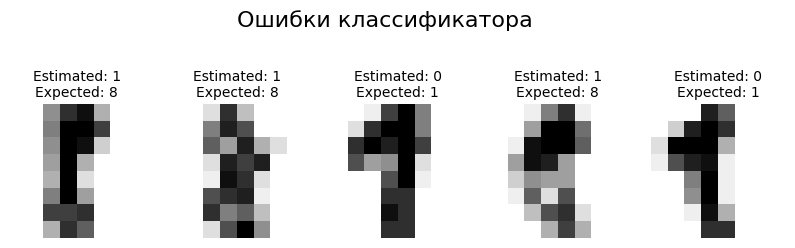

In [ ]:
#@title Ошибки классификатора

# позиции ошибок

pos = []

for i in range(len(y_test)):
    if (y_test1[i] != y_pred[i]):
        pos.append(i)

# визуализация ошибок

# Создаем фигуру и подграфики
fig, axes = plt.subplots(1, 5, figsize=(10, 4))

# Проходимся по каждому подграфику и добавляем imshow и заголовок
for i, ax in enumerate(axes):
    ax.imshow(np.array(X_test)[pos[i]].reshape((8, 8)), cmap=plt.cm.binary)
    ax.set_title(f'Estimated: {y_pred[pos[i]]}\nExpected: {y_test[pos[i]]}', fontsize=10)
    ax.axis("off")

fig.suptitle('Ошибки классификатора', fontsize=16, y=0.9)
fig.show()

## 3. Обучение (бинарная классификация: ноль и не ноль)

In [ ]:
#@title Обновляем значения целевых признаков (классы 0 или 1)

y_train2 = np.where(y_train == 0, 0, 1)
y_test2 =np.where(y_test == 0, 0, 1)

In [ ]:
#@title MLPClassifier + TypeScaler

res1 = []
res2 = []
res3 = []
res4 = []

# получаем данные

for i in range(100):
    pipe1 = Pipeline(steps=[('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train2)
    y_pred1 = pipe1.predict(X_test)
    res1.append(np.where(y_pred1 != y_test2)[0].shape[0])

    pipe2 = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train2)
    y_pred2 = pipe2.predict(X_test)
    res2.append(np.where(y_pred2 != y_test2)[0].shape[0])

    pipe3 = Pipeline(steps=[('scaler', MinMaxScaler((-1, 1))), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train2)
    y_pred3 = pipe3.predict(X_test)
    res3.append(np.where(y_pred3 != y_test2)[0].shape[0])

    pipe4 = Pipeline(steps=[('scaler', StandardScaler()), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train2)
    y_pred4 = pipe4.predict(X_test)
    res4.append(np.where(y_pred4 != y_test2)[0].shape[0])

df = pd.DataFrame()
df['mistakes'] = res1 + res2 + res3 + res4
df['typeScaler'] = ['None' for i in range(100)] + ['MinMaxScaler [0, 1]' for i in range(100)] + ['MinMaxScaler [-1, 1]' for i in range(100)] + ['StandardScaler' for i in range(100)]

# график

fig = px.box(df, y='mistakes', x='typeScaler')

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    title="MLPClassifier + TypeScaler",
    yaxis_title="Кол-во ошибок",
    xaxis_title="TypeScaler"
)

fig.show()

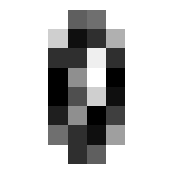

In [ ]:
#@title Единственная ошибка

pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train2)
y_pred = pipe.predict(X_test)

# позиции ошибок

pos = np.where(y_pred != y_test2)[0]

# визуализация ошибок

plt.figure(1, figsize=(2, 2))
plt.imshow(np.array(X_test)[pos[0]].reshape((8, 8)), cmap=plt.cm.binary)
plt.axis("off")
plt.show()

In [ ]:
#@title MLPClassifier + Isomap + TypeScaler

res1 = []
res2 = []
res3 = []
res4 = []

# получаем данные

for i in range(100):
    pipe1 = Pipeline(steps=[('isomap', Isomap(n_components=32)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train2)
    y_pred1 = pipe1.predict(X_test)
    res1.append(np.where(y_pred1 != y_test2)[0].shape[0])

    pipe2 = Pipeline(steps=[('scaler', MinMaxScaler()), ('isomap', Isomap(n_components=32)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train2)
    y_pred2 = pipe2.predict(X_test)
    res2.append(np.where(y_pred2 != y_test2)[0].shape[0])

    pipe3 = Pipeline(steps=[('scaler', MinMaxScaler((-1, 1))), ('isomap', Isomap(n_components=32)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train2)
    y_pred3 = pipe3.predict(X_test)
    res3.append(np.where(y_pred3 != y_test2)[0].shape[0])

    pipe4 = Pipeline(steps=[('scaler', StandardScaler()), ('isomap', Isomap(n_components=32)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train2)
    y_pred4 = pipe4.predict(X_test)
    res4.append(np.where(y_pred4 != y_test2)[0].shape[0])

df = pd.DataFrame()
df['mistakes'] = res1 + res2 + res3 + res4
df['typeScaler'] = ['None' for i in range(100)] + ['MinMaxScaler [0, 1]' for i in range(100)] + ['MinMaxScaler [-1, 1]' for i in range(100)] + ['StandardScaler' for i in range(100)]

# график

fig = px.box(df, y='mistakes', x='typeScaler')

# Обновляем визуализацию графика: добавляем заголовки, меняем названия осей
fig.update_layout(
    title="MLPClassifier + Isomap + TypeScaler",
    yaxis_title="Кол-во ошибок",
    xaxis_title="TypeScaler"
)

fig.show()

#### Итоговая модель

In [ ]:
#@title Создаем Pipeline

pipe = Pipeline(steps=[('scaler', StandardScaler()), ('isomap', Isomap(n_components=32)), ('estimator', MLPClassifier(max_iter=1000))]).fit(X_train, y_train2)
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('isomap', Isomap(n_components=32)),
                ('estimator', MLPClassifier(max_iter=1000))])

In [ ]:
#@title Обучающая выборка

y_pred = pipe.predict(X_train)
print(classification_report(y_train2, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00      1214

    accuracy                           1.00      1347
   macro avg       1.00      1.00      1.00      1347
weighted avg       1.00      1.00      1.00      1347



In [ ]:
#@title Тестовая выборка

y_pred = pipe.predict(X_test)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00       405

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



In [ ]:
#@title Визуализация ошибок

classes = pipe[-1].classes_
fig = px.imshow(confusion_matrix(y_test2, y_pred), x=classes, y=classes, color_continuous_scale=['#ffffff', '#23c552', '#23c552', '#23c552', '#23c552', '#23c552'], text_auto=True)

fig.update_layout(width=400, height=400)
fig.show()